<a href="https://colab.research.google.com/github/Gautam-1982/New-Blogs/blob/main/Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import  drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import seaborn as sns

In [4]:
#Read the csv file into dataframe df
data = pd.read_csv('/content/drive/MyDrive/train_news.csv')

In [5]:
data

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [6]:
# dropping the unnammed column and the id column:
df = data.iloc[:,2:]

In [7]:
df

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...
20795,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [8]:
# total number of records in the dataset
df.shape

(20800, 4)

In [9]:
# get the datatype of the features
df.dtypes

headline      object
written_by    object
news          object
label          int64
dtype: object

The features of headline , written_by and news are object type and only label is int in this dataset

In [10]:
# let's check for the missing values in the dataset
df.isna().sum()

headline       558
written_by    1957
news            39
label            0
dtype: int64

There are many missing data Prasent this Dataset .

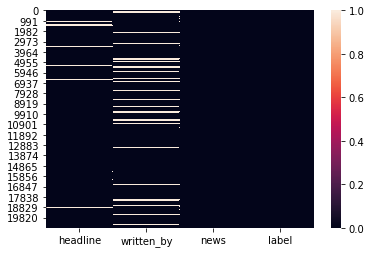

In [11]:
#checking missing data in heatmap :
sns.heatmap(df.isna())

Figure shows missing value are Preset.

In [12]:
df.iloc[46,:]

headline                        مذكرة مفاهيمية عن رئاسة الروسية
written_by                                      voltairenet.org
news          اجتماع لمجلس الأمن من 28 أكتوبر 2016\nمذكرة مف...
label                                                         1
Name: 46, dtype: object

There are non -englist words in the nes also , we need to remove tham as well

In [13]:
df

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...
20795,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [14]:
# first lets treat the missing values in the datasets

df.headline.fillna('notavailable',inplace=True)
df.written_by.fillna('unknown',inplace=True)
df.news.fillna('text',inplace=True)

In [15]:
df.isna().sum()

headline      0
written_by    0
news          0
label         0
dtype: int64

Now no any Null Value are Prasernt in dataset

In [16]:
df[df.label == 0]['headline']

0        Ethics Questions Dogged Agriculture Nominee as...
1        U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2        Cotton to House: ’Do Not Walk the Plank and Vo...
3        Paul LePage, Besieged Maine Governor, Sends Co...
6        Rapid Evolution Saved This Fish From Pollution...
                               ...                        
20790    A Suburban Experiment Aims for Free Energy - T...
20793    Assad’s History of Chemical Attacks, and Other...
20794    One Police Shift: Patrolling an Anxious Americ...
20798    How to Stretch the Summer Solstice - The New Y...
20799    Emory University to Pay for ’100 Percent’ of U...
Name: headline, Length: 10387, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


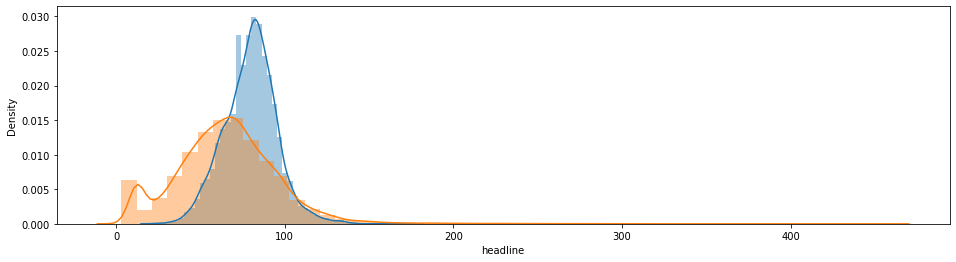

In [17]:
plt.figure(figsize=(16,4))
sns.distplot(df[df.label == 0]['headline'].str.len())
sns.distplot(df[df.label == 1]['headline'].str.len())

Most of the headlines have between 50 to 120 words.
Fake news are less word count in the title relative to genuine news records.


# Data Processing

In [18]:
df.sample(5)

,headline,written_by,news,label
12611,What Does Washington ‘Plan B’ in Syria Really ...,The Saker,"10 Comments on ""What Does Washington ‘Plan B’ ...",1
17420,"Desperate To ‘Preserve His Legacy’, Barack Oba...",Geoffrey Grider,"Desperate To ‘Preserve His Legacy’, Barack O...",1
11499,First effect of Trump win: Al-Qaeda morale in ...,Mike Rivero,"November 12, 2016 213 Donald Trump's election ...",1
15887,Israel’s Parliament Draws a Line on Short Heml...,Isabel Kershner,JERUSALEM — How short is a short skirt and ...,0
8144,Girl Posting to Twitter From Aleppo Gains Symp...,"Rick Gladstone, Megan Specia and Sydney Ember","She is a with dimples, pink hair ribbons, a...",0


## combine headline and the written by features since written_by alone would not provide much vlues sinces it's mostly names of the authors.

In [19]:
df['Head_Writter'] = df.headline + ' ' + df.written_by

In [20]:
df

,headline,written_by,news,label,Head_Writter
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,Ethics Questions Dogged Agriculture Nominee as...
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,Cotton to House: ’Do Not Walk the Plank and Vo...
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,A Digital 9/11 If Trump Wins Finian Cunningham
...,...,...,...,...,...
20795,notavailable,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1,notavailable NeverSurrender
20796,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1,Albert Pike and the European Migrant Crisis Ri...
20797,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1,Dakota Access Caught Infiltrating Protests to ...
20798,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0,How to Stretch the Summer Solstice - The New Y...


In [21]:
import re

In [22]:
url = re.compile(r'https?://\S+|www\.\S+')

In [23]:
# function to remove url from the feautre if any
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [24]:
# function to remove any html code from the feature if any
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)


Remove extra spaces if 2 or more consecutive spaces are present

In [25]:
df.Head_Writter= df.Head_Writter.apply(lambda x: remove_URL(x))
df.Head_Writter = df.Head_Writter.apply(lambda x: remove_html(x))

In [26]:
df.news = df.news.apply(lambda x: remove_URL(x))
df.news = df.news.apply(lambda x: remove_html(x))

In [27]:
## nlp_processor

In [28]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [29]:
# Training data

In [30]:
def nlp_preprocessor(X,col):
    corpus_train=[]
    ps = PorterStemmer()
    for i in range(len(X)):
        input = re.sub('[^a-zA-Z]',' ',X[col][i]) # except a-z and A-Z, substitute all other characters with ' '
        input = input.lower() # Lower case 
        input  = input.split() # tokenize the text
        input = [ps.stem(word) for word in input if word not in stopwords.words('english')] # ignoring stopwords and stemming rest of the words
        text = ' '.join(input)  # concatenating all words into a single text (list is created)#
        corpus_train.append(text) # appending text into a single corpus #
    print("The length of the corpus train is: ", len(corpus_train))
    return corpus_train

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
data = nlp_preprocessor(df,'news')

The length of the corpus train is:  20800


In [33]:
cleaned_news = data.copy()

In [34]:
cleaned_Head_Writter = nlp_preprocessor(df,'Head_Writter')

The length of the corpus train is:  20800


In [35]:
cleaned_Head_Writter

['ethic question dog agricultur nomine georgia governor new york time eric lipton steve eder',
 'u must dig deep stop argentina lionel messi new york time david waldstein',
 'cotton hous walk plank vote bill cannot pass senat breitbart pam key',
 'paul lepag besieg main governor send conflict signal intent new york time jess bidgood',
 'digit trump win finian cunningham',
 'whatev outcom novemb th us collis cours china federico pieraccini unknown',
 'rapid evolut save fish pollut studi say new york time joanna klein',
 'alabama prison offici retali prison strike leader cut water cell brian sonenstein',
 'notavail steventexa',
 'live constant state love gillian',
 'hillari closet drunk new wikileak email reveal aid ask sober day v saxena',
 'bloomberg back pennsylvania attorney gener sentenc month prison iron sheik',
 'video le pen pelt egg keep smile liam deacon',
 'donald trump candid american special interest luke stranahan',
 'notavail hubwolf',
 'wharton busi school backer seek dis

In [36]:
cleaned_df = pd.DataFrame(list(zip(cleaned_news,cleaned_Head_Writter,df.label)),columns=['cleaned_news','cleaned_Head_Writter','label'])

In [37]:
cleaned_df

,cleaned_news,cleaned_Head_Writter,label
0,washington sonni perdu tell georgian grow wear...,ethic question dog agricultur nomine georgia g...,0
1,houston venezuela plan tactic approach design ...,u must dig deep stop argentina lionel messi ne...,0
2,sunday abc week discuss republican plan repeal...,cotton hous walk plank vote bill cannot pass s...,0
3,augusta beleagu republican governor main seem ...,paul lepag besieg main governor send conflict ...,0
4,finian cunningham written extens intern affair...,digit trump win finian cunningham,1
...,...,...,...
20795,dog lick vomit chines overlord,notavail neversurrend,1
20796,rixon stewart novemb rixon stewart nov migrant...,albert pike european migrant crisi rixon stewart,1
20797,post eddi know dakota access pipelin protest w...,dakota access caught infiltr protest incit vio...,1
20798,offici summer societi boutiqu societi memori s...,stretch summer solstic new york time alison cohn,0


# Wordcloud

In [38]:
from wordcloud import WordCloud
from PIL import Image
import requests

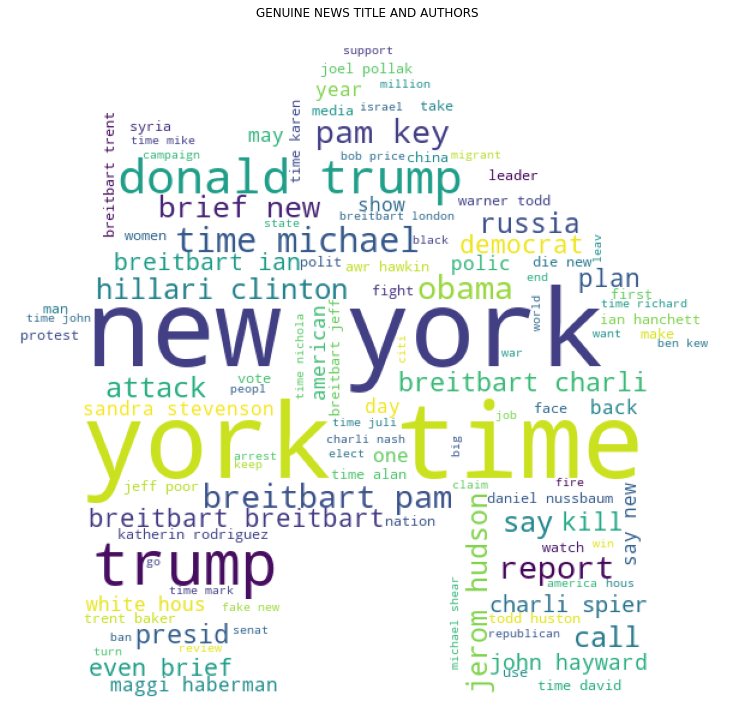

In [44]:
pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))

spams = cleaned_df[cleaned_df.label == 0]['cleaned_Head_Writter']

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                mask = pic, 
                min_font_size = 10).generate(' '.join(spams))

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('GENUINE NEWS TITLE AND AUTHORS')
plt.show()

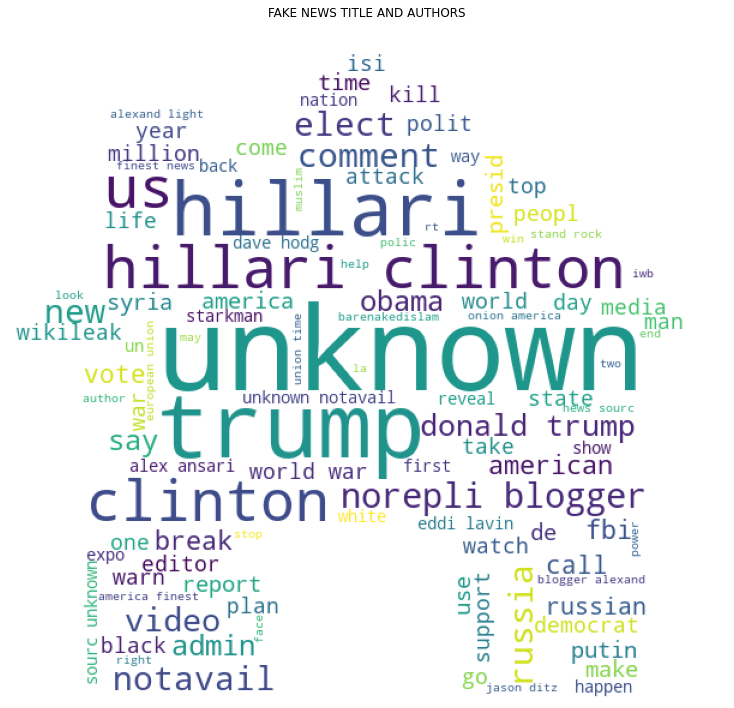

In [41]:
pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))

spams = cleaned_df[cleaned_df.label == 1]['cleaned_Head_Writter']

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                mask = pic, 
                min_font_size = 10).generate(' '.join(spams))

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('FAKE NEWS TITLE AND AUTHORS')
plt.show()

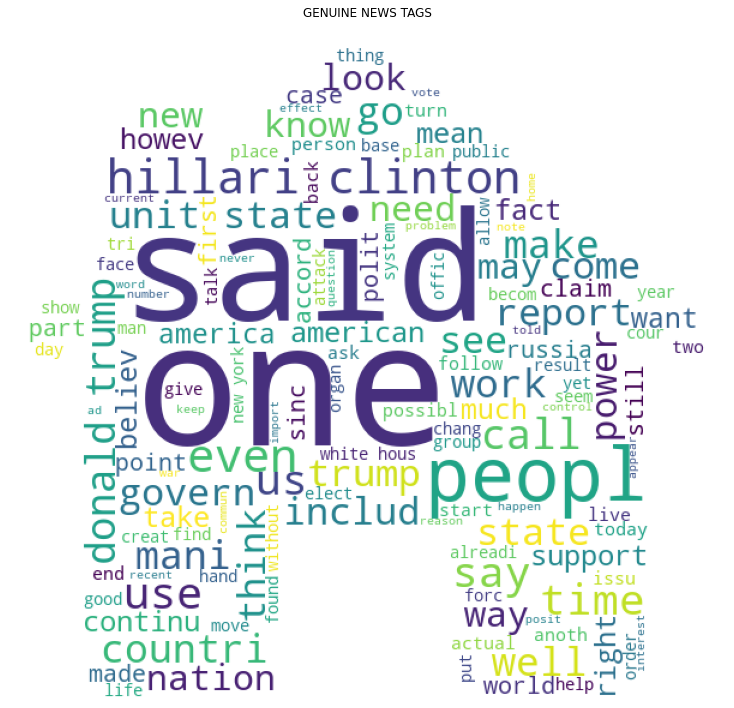

In [42]:
pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))

spams = cleaned_df[cleaned_df.label == 1]['cleaned_news']

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                mask = pic, 
                min_font_size = 10).generate(' '.join(spams))

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('GENUINE NEWS TAGS')
plt.show()

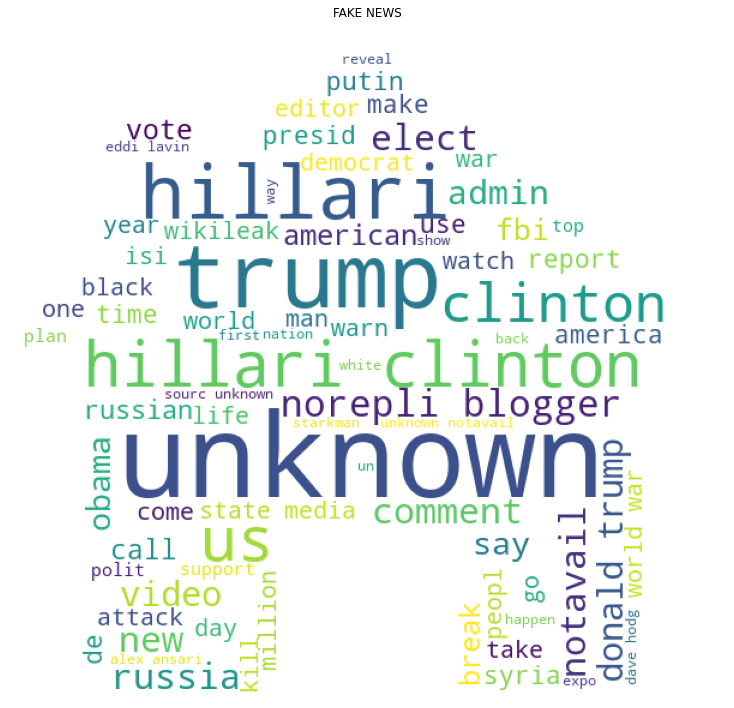

In [46]:
pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))

spams = cleaned_df[cleaned_df.label == 1]['cleaned_Head_Writter']

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                mask = pic, 
                min_font_size = 10).generate(' '.join(spams))

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('FAKE NEWS')
plt.show()

We can note the most of the fake news are crcle arounf trump, cliton, russia and politics.

# Saving the cleaned data

In [47]:
#saving the cleaned data
cleaned_df.to_csv('cleaned_data.csv',index=False,columns=cleaned_df.columns)

In [48]:
cleaned_df  = pd.read_csv("cleaned_data.csv")

In [49]:
cleaned_df.dropna(inplace=True)

# Train and Test split

In [50]:
training_data = cleaned_df.iloc[:17000,:]
testing_data = cleaned_df.iloc[17000:,:2]

In [51]:
testing_data_ground_truth = cleaned_df.iloc[17000:,-1]

In [52]:
training_data.shape

(17000, 3)

In [53]:
testing_data.shape

(3658, 2)

In [54]:
training_data.head()

,cleaned_news,cleaned_Head_Writter,label
0,washington sonni perdu tell georgian grow wear...,ethic question dog agricultur nomine georgia g...,0
1,houston venezuela plan tactic approach design ...,u must dig deep stop argentina lionel messi ne...,0
2,sunday abc week discuss republican plan repeal...,cotton hous walk plank vote bill cannot pass s...,0
3,augusta beleagu republican governor main seem ...,paul lepag besieg main governor send conflict ...,0
4,finian cunningham written extens intern affair...,digit trump win finian cunningham,1


In [55]:
testing_data.head()

,cleaned_news,cleaned_Head_Writter
17117,witwatersrand basin south africa mile unus min...,vision life mar earth depth new york time kenn...
17118,year scientist other concern climat chang talk...,iceland carbon dioxid storag project lock away...
17119,new email releas part wikileak podesta dump fe...,hillari clinton staffer black voter stupid eur...
17120,earn million fight floyd mayweath boxer politi...,world champion boxer manni pacquiao build home...
17121,comment american captiv last night world seri ...,watch world seri big news broke michael krieger


# Feature Target Split

In [56]:
X = training_data.iloc[:,:-1]
y = training_data.iloc[:,-1]

In [57]:
X.shape,y.shape

((17000, 2), (17000,))

# Training and validation split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=42)

In [60]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((11900, 2), (11900,), (5100, 2), (5100,))

# Tokenization/Vectorization

In [61]:
X_train

,cleaned_news,cleaned_Head_Writter
9230,leader broken democrat parti new messag tri st...,broken democrat parti new messag donald trump ...
16643,zika viru harmless caus birth defect told moon...,zika viru harmless caus birth defect told unknown
4853,got love bed good bed actress patti lupon said...,patti lupon christin ebersol broadway friendli...
6866,home badg abus shot fire arrest made militar p...,shot fire arrest made militar polic remov pipe...
7769,comment realli happen michel obama campaign hi...,hell frozen michel obama made hillari destroy ...
...,...,...
11359,novemb pm day ago berni sander respond trump e...,berni sander rise senat prepar becom trump wor...
12047,rapper unload black celebr met donald trump el...,rapper trump poster child white supremaci jero...
5427,view novemb gold kwn king world news investor ...,alert former soro associ warn go send world to...
867,gold medal olympian turn realiti tv star caitl...,report tran jenner attend donald trump inaugur...


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

In [64]:
cv2 =  CountVectorizer(max_features=5000,ngram_range=(1,3))

In [65]:
X_train_vect = cv.fit_transform(X_train.cleaned_news).toarray()

In [66]:
X_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [67]:
X_val_vect = cv.transform(X_val.cleaned_news).toarray()

In [68]:
X_val_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [69]:
X_train_vect.shape,X_val_vect.shape

((11900, 5000), (5100, 5000))

# Model building

## Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
from sklearn.metrics import log_loss,recall_score,precision_score,f1_score,classification_report,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [72]:
def train_n_pred_model(model_name):
    model_name.fit(X_train_vect,y_train)
    y_preds = model_name.predict(X_val_vect)
    print("Log loss -->" , log_loss(y_val,y_preds))
    print("Recall -->" , recall_score(y_val,y_preds))
    print("Precision -->" , precision_score(y_val,y_preds))
    print("F1 Score --> ",f1_score(y_val,y_preds))
    print("Classification Report --> \n", classification_report(y_val,y_preds))

In [73]:
train_n_pred_model(LogisticRegression(max_iter=1000))

Log loss --> 1.862409773528316
Recall --> 0.9540816326530612
Precision --> 0.9389725762842797
F1 Score -->  0.9464668094218415
Classification Report --> 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      2552
           1       0.94      0.95      0.95      2548

    accuracy                           0.95      5100
   macro avg       0.95      0.95      0.95      5100
weighted avg       0.95      0.95      0.95      5100



In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
train_n_pred_model(DecisionTreeClassifier())

Log loss --> 4.022795659893105
Recall --> 0.8771585557299842
Precision --> 0.8883147853736089
F1 Score -->  0.8827014218009479
Classification Report --> 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      2552
           1       0.89      0.88      0.88      2548

    accuracy                           0.88      5100
   macro avg       0.88      0.88      0.88      5100
weighted avg       0.88      0.88      0.88      5100



In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
train_n_pred_model(RandomForestClassifier())

Log loss --> 2.0588032880986975
Recall --> 0.9340659340659341
Precision --> 0.9459459459459459
F1 Score -->  0.9399684044233808
Classification Report --> 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2552
           1       0.95      0.93      0.94      2548

    accuracy                           0.94      5100
   macro avg       0.94      0.94      0.94      5100
weighted avg       0.94      0.94      0.94      5100



In [78]:
from sklearn.ensemble import AdaBoostClassifier

In [79]:
train_n_pred_model(AdaBoostClassifier())

Log loss --> 2.2687550610546183
Recall --> 0.9474097331240189
Precision --> 0.9231357552581262
F1 Score -->  0.9351152430757311
Classification Report --> 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      2552
           1       0.92      0.95      0.94      2548

    accuracy                           0.93      5100
   macro avg       0.93      0.93      0.93      5100
weighted avg       0.93      0.93      0.93      5100



In [80]:
from sklearn.naive_bayes import GaussianNB

In [81]:
train_n_pred_model(GaussianNB())

Log loss --> 5.3366726980516
Recall --> 0.923861852433281
Precision --> 0.7985074626865671
F1 Score -->  0.8566229985443959
Classification Report --> 
               precision    recall  f1-score   support

           0       0.91      0.77      0.83      2552
           1       0.80      0.92      0.86      2548

    accuracy                           0.85      5100
   macro avg       0.85      0.85      0.84      5100
weighted avg       0.85      0.85      0.84      5100



Logistic Regression is giving us the best results, let's do hyper parameter tuning on Logistic Regression

# **Hyperparameter Tuning**

In [82]:
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV

In [89]:
model = LogisticRegression(max_iter=1000)
solvers = ['lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,C=c_values)
cross_val = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cross_val,n_jobs=-1, scoring='f1',error_score=0,verbose=3)

In [90]:
grid_search.fit(X_train_vect, y_train)

Fitting 15 folds for each of 10 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

# Final Model Testing on the Test Dataset

In [91]:
testing_data

,cleaned_news,cleaned_Head_Writter
17117,witwatersrand basin south africa mile unus min...,vision life mar earth depth new york time kenn...
17118,year scientist other concern climat chang talk...,iceland carbon dioxid storag project lock away...
17119,new email releas part wikileak podesta dump fe...,hillari clinton staffer black voter stupid eur...
17120,earn million fight floyd mayweath boxer politi...,world champion boxer manni pacquiao build home...
17121,comment american captiv last night world seri ...,watch world seri big news broke michael krieger
...,...,...
20795,dog lick vomit chines overlord,notavail neversurrend
20796,rixon stewart novemb rixon stewart nov migrant...,albert pike european migrant crisi rixon stewart
20797,post eddi know dakota access pipelin protest w...,dakota access caught infiltr protest incit vio...
20798,offici summer societi boutiqu societi memori s...,stretch summer solstic new york time alison cohn


In [92]:
test_vect = cv.transform(testing_data.cleaned_news).toarray()

In [93]:
test_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
model = LogisticRegression(max_iter=1000)

In [96]:
model.fit(X_train_vect,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
test_prediction = model.predict(test_vect)

Final Model Evaluation ---->


## Log Loss

In [101]:
log_loss(testing_data_ground_truth,test_prediction)

1.954515327571385


## Recall

In [102]:
recall_score(testing_data_ground_truth,test_prediction)

0.9493807215939688

## Precision

In [103]:
precision_score(testing_data_ground_truth,test_prediction)

0.9397654584221748

## F1-Score

In [104]:
f1_score(testing_data_ground_truth,test_prediction)

0.9445486204125368

## ROC_AUC Score

In [106]:
import numpy as np
from sklearn.metrics import roc_auc_score

In [107]:
roc_auc_score(testing_data_ground_truth,test_prediction)

0.943318900497151

## Classification Report

In [108]:
print(classification_report(testing_data_ground_truth,test_prediction))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1801
           1       0.94      0.95      0.94      1857

    accuracy                           0.94      3658
   macro avg       0.94      0.94      0.94      3658
weighted avg       0.94      0.94      0.94      3658



## Confusion Matrix

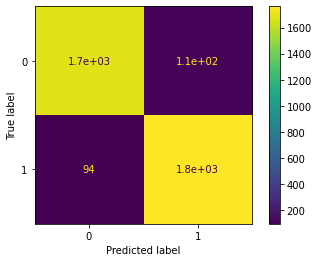

In [109]:
plot_confusion_matrix(model,test_vect,testing_data_ground_truth)

## Sensitivity and Specificity Curve

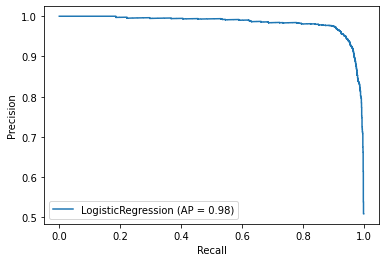

In [110]:
plot_precision_recall_curve(model,test_vect,testing_data_ground_truth)

## ROC CURVE

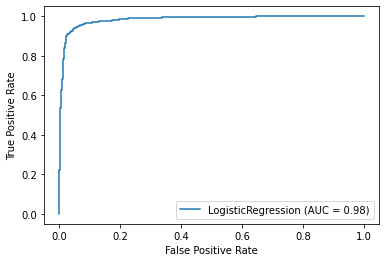

In [111]:
plot_roc_curve(model,test_vect,testing_data_ground_truth)

# Saving the final model

In [112]:
import joblib

In [113]:
joblib.dump(model,'Fake_News_Detector_Model.pkl')

['Fake_News_Detector_Model.pkl']